In [16]:
!pip install pandas
!pip install numpy
!pip install nltk
!pip install wordcloud


   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.4 kB 330.3 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/301.4 kB 469.7 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/301.4 kB 469.7 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/301.4 kB 469.7 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/301.4 kB 469.7 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/301.4 kB 361.0 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/301.4 kB 399.3 kB/s eta 0:00:01
   ------------------------ ------------- 194.6/301.4 kB 472.6 kB/s eta 0:00:01
   -------------------------------- ----- 256.0/301.4 kB 562.4 kB/s eta 0:00:01
   -------------------------------------  297.0/301.4 kB 592.4 kB/s eta 0:00:01
   -------------------------------------- 301.4/301.4 kB 

In [24]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
import string

data = pd.read_excel("C:\\Users\ABIJEETH R\OneDrive\Desktop\Book1.xlsx")
data

<>:9: SyntaxWarning: invalid escape sequence '\A'
<>:9: SyntaxWarning: invalid escape sequence '\A'
C:\Users\ABIJEETH R\AppData\Local\Temp\ipykernel_10320\253807498.py:9: SyntaxWarning: invalid escape sequence '\A'
  data = pd.read_excel("C:\\Users\ABIJEETH R\OneDrive\Desktop\Book1.xlsx")


,Brand Name,Product URL,Image,Product Ratings,Number of ratings,Product Info,Selling Price,Price,Discount
0,Rain & Rainbow,https://www.myntra.com/kurtis/rain--rainbow/ra...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",4.2,28,Printed Pure Cotton Kurti,837.0,1395.0,(40% OFF)
1,HERE&NOW,https://www.myntra.com/kurtis/herenow/herenow-...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",4.2,805,Embroidered Pure Cotton A-Line Kurti,719.0,1799.0,(60% OFF)
2,Anouk,https://www.myntra.com/kurtis/anouk/anouk-wome...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",4.2,2800,Printed Pure Cotton Indigo Anarkali Kurta,594.0,1699.0,(65% OFF)
3,Anubhutee,https://www.myntra.com/kurtis/anubhutee/anubhu...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",4.3,1100,Ethnic Motifs Printed Kurti,521.0,1739.0,(70% OFF)
4,GERUA,https://www.myntra.com/kurtis/gerua/gerua-wome...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",4.2,157,Ethnic Motifs Printed Kurti,449.0,1499.0,(70% OFF)
...,...,...,...,...,...,...,...,...,...
594,FAWOMENT,https://www.myntra.com/kurtis/fawoment/fawomen...,NaN,NaN,0,Floral Embroidered Kurti,911.0,3037.0,(70% OFF)
595,Fabindia,https://www.myntra.com/kurtis/fabindia/fabindi...,NaN,NaN,0,Yoke Design Kurti,1959.0,2799.0,(30% OFF)
596,all about you,https://www.myntra.com/kurtis/all-about-you/al...,NaN,NaN,0,Yoke Design A-Line Kurti,759.0,1899.0,(60% OFF)
597,MALHAAR,https://www.myntra.com/kurtis/malhaar/malhaar-...,NaN,4.8,6,Pure Cotton Kurti,574.0,2299.0,(75% OFF)


In [26]:
print(data.isnull().sum())

Brand Name             0
Product URL            0
Image                467
Product Ratings      198
Number of ratings      0
Product Info           0
Selling Price         74
Price                 74
Discount              74
dtype: int64


In [28]:
data = data.drop("Image",axis=1)

In [30]:
data

,Brand Name,Product URL,Product Ratings,Number of ratings,Product Info,Selling Price,Price,Discount
0,Rain & Rainbow,https://www.myntra.com/kurtis/rain--rainbow/ra...,4.2,28,Printed Pure Cotton Kurti,837.0,1395.0,(40% OFF)
1,HERE&NOW,https://www.myntra.com/kurtis/herenow/herenow-...,4.2,805,Embroidered Pure Cotton A-Line Kurti,719.0,1799.0,(60% OFF)
2,Anouk,https://www.myntra.com/kurtis/anouk/anouk-wome...,4.2,2800,Printed Pure Cotton Indigo Anarkali Kurta,594.0,1699.0,(65% OFF)
3,Anubhutee,https://www.myntra.com/kurtis/anubhutee/anubhu...,4.3,1100,Ethnic Motifs Printed Kurti,521.0,1739.0,(70% OFF)
4,GERUA,https://www.myntra.com/kurtis/gerua/gerua-wome...,4.2,157,Ethnic Motifs Printed Kurti,449.0,1499.0,(70% OFF)
...,...,...,...,...,...,...,...,...
594,FAWOMENT,https://www.myntra.com/kurtis/fawoment/fawomen...,NaN,0,Floral Embroidered Kurti,911.0,3037.0,(70% OFF)
595,Fabindia,https://www.myntra.com/kurtis/fabindia/fabindi...,NaN,0,Yoke Design Kurti,1959.0,2799.0,(30% OFF)
596,all about you,https://www.myntra.com/kurtis/all-about-you/al...,NaN,0,Yoke Design A-Line Kurti,759.0,1899.0,(60% OFF)
597,MALHAAR,https://www.myntra.com/kurtis/malhaar/malhaar-...,4.8,6,Pure Cotton Kurti,574.0,2299.0,(75% OFF)


In [32]:
data = data.dropna()

In [34]:
data.shape

(364, 8)

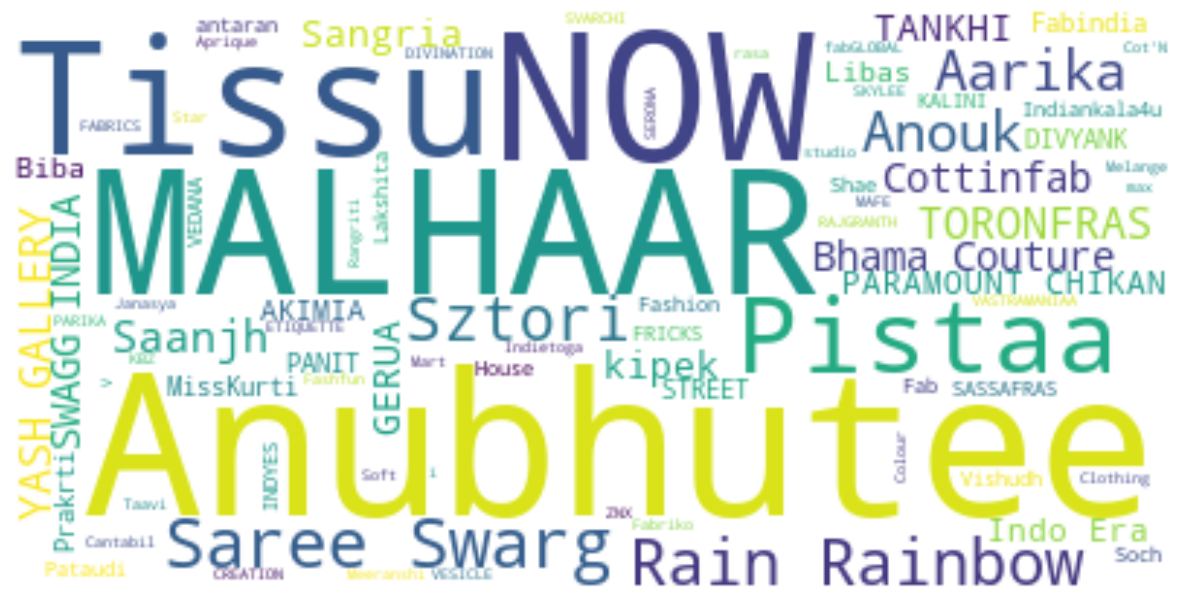

In [36]:
text = " ".join(i for i in data["Brand Name"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [42]:
highest_rated = data.sort_values(by=["Product Ratings"], 
                                 ascending=False)
highest_rated = highest_rated
highest_rated[['Product Info', "Product Ratings", "Brand Name"]]

,Product Info,Product Ratings,Brand Name
435,Mandarin Collar Kurti,5.0,INDYES
249,Floral Printed Kaftan Kurta,5.0,Sangria
448,Solid Pure Cotton Kurti,5.0,MALHAAR
308,Floral Printed Kurti,5.0,MALHAAR
538,Pure Cotton Kurti,5.0,MALHAAR
...,...,...,...
161,Women Printed Kurti,3.0,Saree Swarg
469,Paisley Printed Anarkali Kurti,2.9,MAFE
590,Printed Kurti,2.7,KALINI
511,Women Embroidered Kurti,2.1,PARIKA CREATION


In [46]:
mr = data['Product Ratings'].mean()
m = data['Number of ratings'].quantile(0.9)
n = data['Number of ratings']
a = data['Product Ratings']
data["Score"]  = (n/(n+m) * a) + (m/(m+n) * mr)

recommendations = data.sort_values('Score', ascending=False)
recommendations[['Brand Name', 'Product Info',
                       'Product Ratings', 'Score', 
                       'Selling Price', 'Discount']].head(10)

C:\Users\ABIJEETH R\AppData\Local\Temp\ipykernel_10320\4183830716.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Score"]  = (n/(n+m) * a) + (m/(m+n) * mr)


,Brand Name,Product Info,Product Ratings,Score,Selling Price,Discount
48,Tissu,Women Floral Print A-Line Kurti,4.4,4.338320,549.0,(45% OFF)
11,Anubhutee,Ethnic Motifs Printed Kurti,4.4,4.300868,521.0,(70% OFF)
155,Anubhutee,Women Printed Kurti,4.4,4.296895,486.0,(72% OFF)
66,YASH GALLERY,Printed A-Line Kurti,4.5,4.295568,629.0,(55% OFF)
27,Anubhutee,Women Printed Straight Kurti,4.3,4.274815,521.0,(70% OFF)
102,AKIMIA,Embroidered Pure Cotton Kurti,4.5,4.273667,767.0,(52% OFF)
88,Tissu,Women Floral Printed Straight Kurti,4.3,4.267992,548.0,(39% OFF)
3,Anubhutee,Ethnic Motifs Printed Kurti,4.3,4.267992,521.0,(70% OFF)
42,Rain & Rainbow,Women Printed Pure Cotton Pure Cotton A-Line K...,4.4,4.264685,797.0,(50% OFF)
18,GERUA,Ethnic Motifs Printed Kurti,4.6,4.262359,449.0,(70% OFF)


In [48]:
print(m)

376.3999999999994


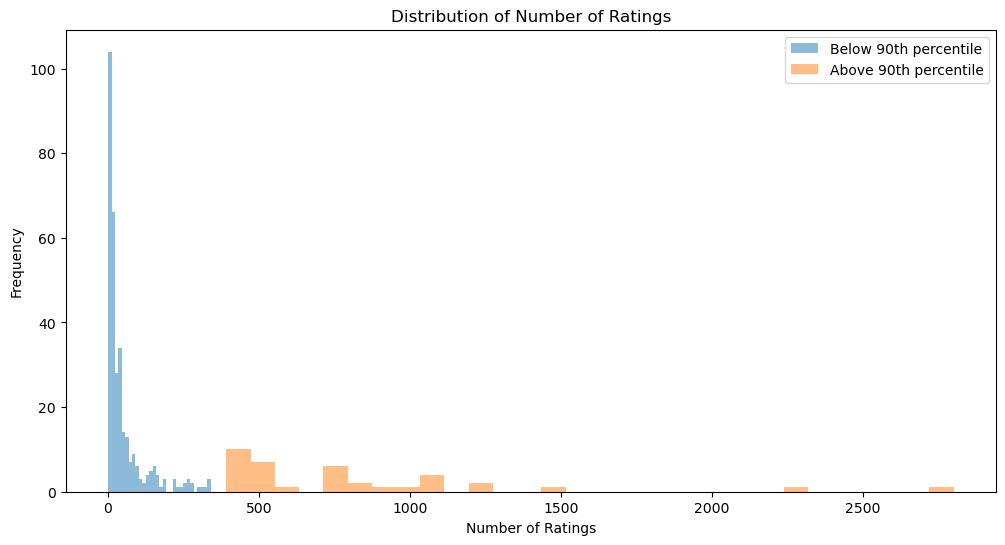

In [50]:
import matplotlib.pyplot as plt

# Calculate the 90th percentile
m = data['Number of ratings'].quantile(0.9)

# Separate data into above and below the 90th percentile
above_90th = data[data['Number of ratings'] > m]
below_90th = data[data['Number of ratings'] <= m]

# Plot histograms for comparison
plt.figure(figsize=(12, 6))

plt.hist(below_90th['Number of ratings'], bins=30, alpha=0.5, label='Below 90th percentile')
plt.hist(above_90th['Number of ratings'], bins=30, alpha=0.5, label='Above 90th percentile')

plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Ratings')
plt.legend()
plt.show()
